In [1]:
cd 

C:\Users\moury


In [2]:
cd INFO6105 DS methods n tools with ML

C:\Users\moury\INFO6105 DS methods n tools with ML


In [3]:
cd Final Project

C:\Users\moury\INFO6105 DS methods n tools with ML\Final Project


In [4]:
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import os
for dirname, _, filenames in os.walk('Final Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
!pip install xgboost

In [24]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
seed = 4353

# Reading the Dataset for the musical Instruments

In [25]:
data = pd.read_csv('Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [26]:
#Displaying the Columns to decide on what to work on 
data.columns = data.columns.str.lower()
data.columns

Index(['reviewerid', 'asin', 'reviewername', 'helpful', 'reviewtext',
       'overall', 'summary', 'unixreviewtime', 'reviewtime'],
      dtype='object')

In [27]:
#Managing and finding the null values in the columns
data.isnull().sum()

reviewerid         0
asin               0
reviewername      27
helpful            0
reviewtext         7
overall            0
summary            0
unixreviewtime     0
reviewtime         0
dtype: int64

In [28]:
print('The train dataset contans {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The train dataset contans 10261 rows and 9 columns


Text(0.5, 0, 'Overall ratings')

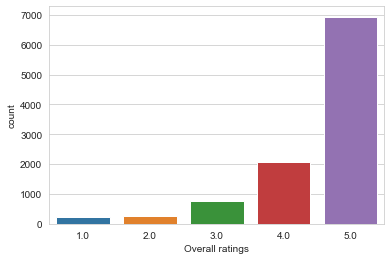

In [29]:
#Plotting the graphs for the Ratings
sns.countplot(data.overall)
plt.xlabel('Overall ratings')

In [30]:
# replacing numerical values with categorical values to reduce the classes to sentiments

data['sentiment'] = data.overall.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

In [31]:
#Creating Train and Test datasets with only the product reviews (complete Review = reviewtext + summary)

X_data = data['reviewtext'] + ' ' + data['summary']
y_data = data['sentiment']

In [32]:
# changing the datatype from object to string

X_data = X_data.astype(str)

In [33]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


In [34]:
# creating functions for text processing

string.punctuation
def final(X_data_full):
    
    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
    # function for tokenizing
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words
    
    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)
        
    # function for lemmatizing
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moury\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moury\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# running the function

data_X = final(X_data)
X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25, random_state= seed)

# Multinomail Naive Bayes Model

In [37]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [38]:
# Model evaluation
#Finding the f1 score and accuracy for the model
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       122
     neutral       0.00      0.00      0.00       208
    positive       0.87      1.00      0.93      2236

    accuracy                           0.87      2566
   macro avg       0.29      0.33      0.31      2566
weighted avg       0.76      0.87      0.81      2566

[[   0    0  122]
 [   0    0  208]
 [   0    0 2236]]
Accuracy :  87.14  %
f1_score :  0.812


C:\Users\moury\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\moury\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Model

In [39]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [40]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       1.00      0.02      0.05       122
     neutral       0.45      0.02      0.05       208
    positive       0.87      1.00      0.93      2236

    accuracy                           0.87      2566
   macro avg       0.78      0.35      0.34      2566
weighted avg       0.85      0.87      0.82      2566

[[   3    2  117]
 [   0    5  203]
 [   0    4 2232]]
Accuracy :  87.3  %
f1_score :  0.818


# SVC Model

In [25]:
# Instatiation and fitting

from sklearn.svm import SVC
from sklearn.model_selection import KFold
svc = SVC(random_state=seed)

In [26]:
# using KFold cross validation technique
kf=  KFold(n_splits=5, random_state=seed)

# Hyperparametric tuning using grid search
param_grid = [{'kernel':['rbf'],
              'gamma':[1e-3, 1e-4],
              'C':[1, 10, 100, 1000]},
             {'kernel':['linear'],
             'C':[1, 10, 100, 1000]}]

grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kf)
grid.fit(X_train, y_train)

print('Estimator: ', grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print('Output Classes: ', grid.classes_)
print('Training Accuracy: ', grid.best_score_)

Estimator:  SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=4353, shrinking=True,
    tol=0.001, verbose=False)
Best params : 
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Output Classes:  ['negative' 'neutral' 'positive']
Training Accuracy:  0.8883690708252112


In [27]:
# predictions

predictions = grid.predict(X_test)

print(classification_report(y_test, predictions))

svc_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
svc_accuracy = round((accuracy_score(y_test, predictions)*100), 2)

print("Accuracy : " , svc_accuracy , " %")
print("f1_score : " , svc_f1)

              precision    recall  f1-score   support

    negative       0.46      0.13      0.20       122
     neutral       0.68      0.12      0.21       208
    positive       0.89      0.99      0.94      2236

    accuracy                           0.88      2566
   macro avg       0.68      0.42      0.45      2566
weighted avg       0.85      0.88      0.84      2566

Accuracy :  88.11  %
f1_score :  0.845


# Comparing the Accuracies and f1 Scores of various models 

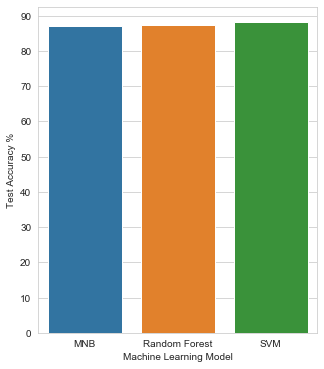

In [36]:
#Comapring the accuracy for various models

model = ['MNB', 'Random Forest',  'SVM']
acc = [MNB_accuracy, rfc_accuracy, svc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(5,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()

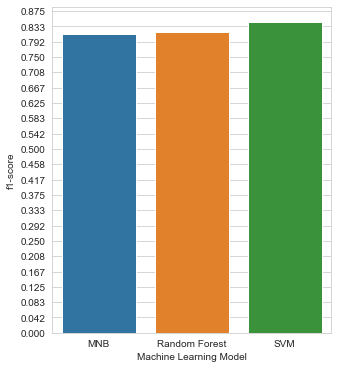

In [37]:
# Comparing the f1-score for various models
model = ['MNB', 'Random Forest',  'SVM']
f1_score = [MNB_f1, rfc_f1, svc_f1]

sns.set_style("whitegrid")
plt.figure(figsize=(5,6))
plt.yticks(np.linspace(0,1,25))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()

#  Food Reviews 

In [2]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
seed = 4353

# Reading the Dataset

In [3]:
data1 = pd.read_csv('Reviews.csv')
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Getting the number of columns
data1.columns = data1.columns.str.lower()
data1.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

In [5]:
#Handling the null values and counting them
data1.isnull().sum()

id                         0
productid                  0
userid                     0
profilename               16
helpfulnessnumerator       0
helpfulnessdenominator     0
score                      0
time                       0
summary                   27
text                       0
dtype: int64

In [6]:
print('The train dataset contans {} rows and {} columns'.format(data1.shape[0], data1.shape[1]))

The train dataset contans 568454 rows and 10 columns


In [7]:
# replacing numerical values with categorical values to reduce the classes to sentiments

data1['sentiment'] = data1.score.replace({
    1.0:'negative',
    2.0:'negative',
    3.0:'neutral',
    4.0:'positive',
    5.0:'positve'
    
})

In [8]:
#Creating Train and Test datasets with only the product reviews (complete Review = reviewtext + summary)

X_data = data1['text'] + ' ' + data1['summary']
y_data = data1['sentiment']

In [9]:
# changing the datatype from object to string

X_data = X_data.astype(str)

In [10]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df=X_data_df.dropna()
X_data_df.head()

,review
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [11]:
# creating functions for text processing

string.punctuation
def final(X_data_full):
    
    # function for removing punctuations
    def remove_punct(X_data_func):
        string1 = X_data_func.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation),' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_data_full_clear_punct = []
    for i in range(len(X_data_full)):
        test_data = remove_punct(X_data_full[i])
        X_data_full_clear_punct.append(test_data)
        
    # function to remove stopwords
    def remove_stopwords(X_data_func):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data_func)
        return string2
    
    X_data_full_clear_stopwords = []
    for i in range(len(X_data_full)):
        test_data = remove_stopwords(X_data_full[i])
        X_data_full_clear_stopwords.append(test_data)
        
    # function for tokenizing
    def tokenize_words(X_data_func):
        words = nltk.word_tokenize(X_data_func)
        return words
    
    X_data_full_tokenized_words = []
    for i in range(len(X_data_full)):
        test_data = tokenize_words(X_data_full[i])
        X_data_full_tokenized_words.append(test_data)
        
    # function for lemmatizing
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data_func):
        words = lemmatizer.lemmatize(X_data_func)
        return words
    
    X_data_full_lemmatized_words = []
    for i in range(len(X_data_full)):
        test_data = lemmatize_words(X_data_full[i])
        X_data_full_lemmatized_words.append(test_data)
        
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    X_data_full_vector = cv.fit_transform(X_data_full_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    X_data_full_tfidf = tfidf.fit_transform(X_data_full_vector).toarray()
    
    return X_data_full_tfidf

In [12]:
# running the function

data_X = final(X_data)
X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25, random_state= seed)

In [13]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [14]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.82      0.22      0.35     20643
     neutral       0.76      0.01      0.02     10767
    positive       0.53      0.00      0.01     20281
     positve       0.66      1.00      0.80     90423

    accuracy                           0.67    142114
   macro avg       0.69      0.31      0.29    142114
weighted avg       0.67      0.67      0.56    142114

[[ 4590    12     8 16033]
 [  603    94    47 10023]
 [  239    16    73 19953]
 [  141     1    11 90270]]
Accuracy :  66.87  %
f1_score :  0.56


In [15]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [16]:
# Model evaluation
#Calculating the f1 score and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.75      0.71      0.73     20643
     neutral       0.77      0.45      0.57     10767
    positive       0.76      0.46      0.57     20281
     positve       0.83      0.96      0.89     90423

    accuracy                           0.81    142114
   macro avg       0.78      0.64      0.69    142114
weighted avg       0.81      0.81      0.80    142114

[[14602   523   605  4913]
 [ 1766  4855   780  3366]
 [ 1185   511  9318  9267]
 [ 1794   390  1507 86732]]
Accuracy :  81.28  %
f1_score :  0.798


# Comparing the Accuracy and f1 Scores

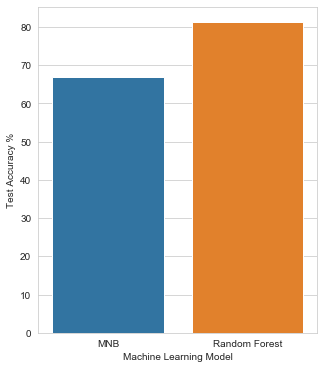

In [18]:
#Comapring the accuracy for various models

model = ['MNB', 'Random Forest',  ]
acc = [MNB_accuracy, rfc_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(5,6))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()

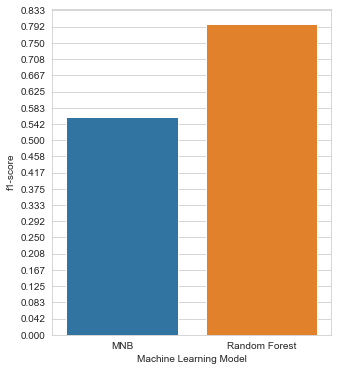

In [19]:
# Comparing the f1-score for various models
model = ['MNB', 'Random Forest',]
f1_score = [MNB_f1, rfc_f1]

sns.set_style("whitegrid")
plt.figure(figsize=(5,6))
plt.yticks(np.linspace(0,1,25))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()